In [110]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [111]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


## initialize

In [112]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 6
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.5

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


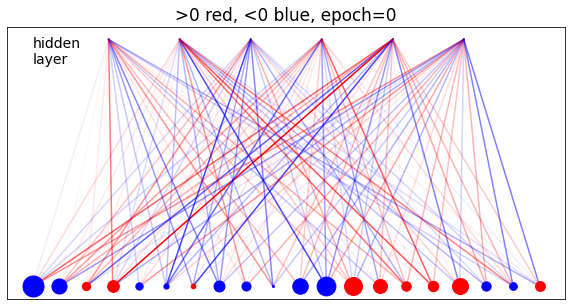

In [113]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [114]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 9
activate(v[k],w,b,GAP,info=True)

input= [0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
act= [ 0.25056461  0.58054898 -0.26065296  0.38056535  2.29437244 -0.69383833]
prob= [0.56231547 0.64119372 0.4352032  0.59400945 0.90840989 0.33317976]
output= [0 0 0 1 1 0]


array([0, 0, 0, 1, 1, 0])

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as Baiesi wrote as $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j<i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [115]:
vtest = v[1]
print(vtest)
htest = np.array([0, 0, 1, 1, 0, 1])  

s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])  #possible states
L = 20
A = 4

def activate_back(h_in,v_in,wei,bias,DE,k):
    e = np.zeros((4)) 

    for i in range(0,L,A):
        for j in range(0,A):
            if np.array_equiv(v_in[i:i+4],s[j])==True: #checks to which state correspond each 4 blocks from v
                loc_f = bias[i:i+4]+np.dot(h_in,wei[:,i:i+4])
                e[j] -= np.dot(loc_f,v_in[i:i+4]) #computes energy for each state 
   
    b = exp(-e)   #boltzmann weights
    #print(b)
    p = b/b.sum() #normalized probability
    
   
    #create cumulative probability array
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i] = cprob[i-1]+ p[i]

    
    #random number from which we decide which state to generate
    vf = np.zeros(L)
    for i in range(0,L,A):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
  
    #to check what's happening 
    for i in range(11):
        if k == 100*i :
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', wei.T[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
            
    return (vf,cprob)


vf,cprob  = activate_back(htest,vtest,w.T,a,GAP,1)
print(cprob)
print(vf)

# PROBLEM: WEIGHTS ARE INCREASING TOO MUCH!


[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0.03317797 0.3742927  0.5170331  1.        ]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]


## RBM train


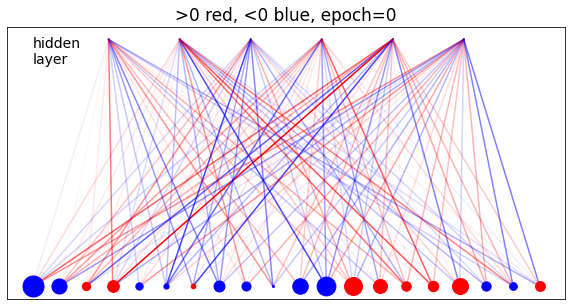

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
EVALUATED ENERGIES =  [ 0.         -1.37929685 -0.04138069 -0.26512458] 

PROBABILITY :  [0.13665029 0.54278968 0.14242361 0.17813642] 

CUMULATIVE PROBABILITY :  [0.13665029 0.67943998 0.82186358 1.        ] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
EVALUATED ENERGIES =  [-1.46604257  1.41102104 -0.19170934  0.02795624] 

PROBABILITY :  [0.64086525 0.03608061 0.17919704 0.14385709] 

CUMULATIVE PROBABILITY :  [0.64086525 0.67694586 0.85614291 1.        ] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
EVALUATED ENERGIES =  [-0.02266661 -0.4616392  -0.9683843   0.        ] 

PROBABILITY :  [0.16384413 0.25414073 0.42184302 0.16017212] 

CUMULATIVE PROBABILITY :  [0.16384413 0.41798486 0.

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 1.36291497  2.2945501  -2.55754261  2.27020286 -0.81598713  2.5861625 ]
EVALUATED ENERGIES =  [  0.         -12.65137181  -6.66262524  -5.21687366] 

PROBABILITY :  [3.19326216e-06 9.96909051e-01 2.49905580e-03 5.88699976e-04] 

CUMULATIVE PROBABILITY :  [3.19326216e-06 9.96912244e-01 9.99411300e-01 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 1.36291497  2.2945501  -2.55754261  2.27020286 -0.81598713  2.5861625 ]
EVALUATED ENERGIES =  [-13.43331358 -11.30548155  -9.51224349 -17.15027914] 

PROBABILITY :  [2.36528043e-02 2.81693568e-03 4.68795611e-04 9.73061464e-01] 

CUMULATIVE PROBABILITY :  [0.0236528  0.02646974 0.02693854 1.        ] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 1.36291497  2.2945501  -2.55754261  2.27020286 -0.81598713  2.5861625 ]
EVALUATED ENERGIES =  [-10.92085883 -13.37221634 -26.85421147   0.        ] 

PROBABILITY :  [1.20290744e-07 1.39586446e-06 9.999984

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 4.3948967   5.24823371 -5.72586547  5.24153353 -3.99597951  5.5498975 ]
EVALUATED ENERGIES =  [  0.         -32.30768249 -16.70448703 -15.00585139] 

PROBABILITY :  [9.31004301e-15 9.99999802e-01 1.67347115e-07 3.06132995e-08] 

CUMULATIVE PROBABILITY :  [9.31004301e-15 9.99999802e-01 9.99999969e-01 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 4.3948967   5.24823371 -5.72586547  5.24153353 -3.99597951  5.5498975 ]
EVALUATED ENERGIES =  [-33.0939456  -30.73936695 -22.67350372 -42.70042192] 

PROBABILITY :  [6.72865629e-05 6.38774882e-06 2.00626335e-09 9.99926324e-01] 

CUMULATIVE PROBABILITY :  [6.72865629e-05 7.36743117e-05 7.36763180e-05 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 4.3948967   5.24823371 -5.72586547  5.24153353 -3.99597951  5.5498975 ]
EVALUATED ENERGIES =  [-29.7595986  -32.8323534  -64.51451987   0.        ] 

PROBABILITY :  [8.05618580e-16 1.74024

----initiating backward CD: k =  1000 ----
WEIGHTS[0] :  [ 6.09152673  6.95656704 -7.52837463  6.9341892  -5.80224325  7.28676564]
EVALUATED ENERGIES =  [-40.26990995 -43.52200541 -29.97266123 -57.29758309] 

PROBABILITY :  [4.02693896e-08 1.04073980e-06 1.35811563e-12 9.99998919e-01] 

CUMULATIVE PROBABILITY :  [4.02693896e-08 1.08100919e-06 1.08101054e-06 1.00000000e+00] 


----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 7.44581245  8.30132895 -9.00837463  8.2941892  -7.28605277  8.61819421]
EVALUATED ENERGIES =  [  0.         -52.35500849 -26.77355297 -24.74988069] 

PROBABILITY :  [1.83024282e-23 1.00000000e+00 7.76452740e-12 1.02623146e-12] 

CUMULATIVE PROBABILITY :  [1.83024282e-23 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 7.44581245  8.30132895 -9.00837463  8.2941892  -7.28605277  8.61819421]
EVALUATED ENERGIES =  [-52.80216904 -50.2367479  -36.11551837 -68.83282118] 

PROBABILITY :  [1.09138048e-07 8.3912

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 10.476777    11.34745838 -12.21798493  11.30087233 -10.49716192
  11.65307342]
EVALUATED ENERGIES =  [  0.         -72.32663607 -36.5439991  -34.52655147] 

PROBABILITY :  [3.88097691e-32 1.00000000e+00 2.88269181e-16 3.83382109e-17] 

CUMULATIVE PROBABILITY :  [3.88097691e-32 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 10.476777    11.34745838 -12.21798493  11.30087233 -10.49716192
  11.65307342]
EVALUATED ENERGIES =  [-72.14318473 -69.31509387 -49.32918439 -94.51062051] 

PROBABILITY :  [1.93172840e-10 1.14214649e-11 2.38754523e-20 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [1.93172840e-10 2.04594305e-10 2.04594305e-10 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 10.476777    11.34745838 -12.21798493  11.30087233 -10.49716192
  11.65307342]
EVALUATED ENERGIES =  [ -67.58823375  -71.09617811 -141.52622118    0.        ] 

PROBABILITY :

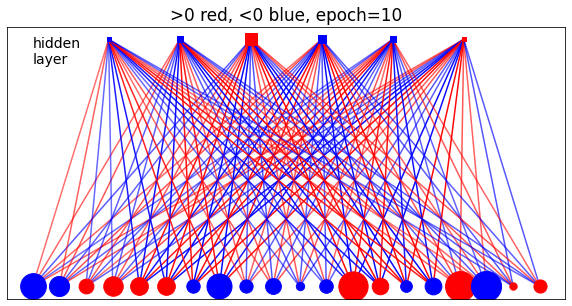

l_rate =  0.9090909090909092
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 13.44478584  14.32059803 -15.41066247  14.28175918 -13.65669301
  14.64298167]
EVALUATED ENERGIES =  [  0.         -91.59510362 -46.15891585 -44.02398606] 

PROBABILITY :  [1.66246277e-40 1.00000000e+00 1.85060773e-20 2.18839718e-21] 

CUMULATIVE PROBABILITY :  [1.66246277e-40 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 13.44478584  14.32059803 -15.41066247  14.28175918 -13.65669301
  14.64298167]
EVALUATED ENERGIES =  [ -90.90470359  -88.27061545  -62.28611609 -119.73719204] 

PROBABILITY :  [3.00752584e-13 2.15893427e-14 1.12024944e-25 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [3.00752584e-13 3.22341926e-13 3.22341926e-13 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 13.44478584  14.32059803 -15.41066247  14.28175918 -13.65669301
  14.64298167]
EVALUATED ENERGIES =  [ -85.98291605  -89.81439081 -178.944111

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 16.35885627  17.20384128 -18.56540448  17.19930218 -16.80445714
  17.52075399]
EVALUATED ENERGIES =  [   0.         -110.5370856   -55.69577089  -53.47007943] 

PROBABILITY :  [9.87083009e-49 1.00000000e+00 1.52306921e-24 1.64480387e-25] 

CUMULATIVE PROBABILITY :  [9.87083009e-49 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 16.35885627  17.20384128 -18.56540448  17.19930218 -16.80445714
  17.52075399]
EVALUATED ENERGIES =  [-109.55309016 -106.64476778  -74.97548546 -144.44136894] 

PROBABILITY :  [7.05038837e-16 3.84719926e-17 6.78188036e-31 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [7.05038837e-16 7.43510829e-16 7.43510829e-16 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 16.35885627  17.20384128 -18.56540448  17.19930218 -16.80445714
  17.52075399]
EVALUATED ENERGIES =  [-103.91595454 -108.2453818  -215.78781297    0.        ] 

PROBA

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 19.23169129  20.08592092 -21.62286339  20.08097095 -19.86746283
  20.42413579]
EVALUATED ENERGIES =  [   0.         -129.32689281  -64.99539162  -62.67056931] 

PROBABILITY :  [6.82407971e-57 1.00000000e+00 1.15128811e-28 1.12596923e-29] 

CUMULATIVE PROBABILITY :  [6.82407971e-57 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 19.23169129  20.08592092 -21.62286339  20.08097095 -19.86746283
  20.42413579]
EVALUATED ENERGIES =  [-127.97450293 -124.68345299  -87.58664223 -168.89727918] 

PROBABILITY :  [1.68835624e-18 6.28317650e-20 4.86675013e-36 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [1.68835624e-18 1.75118801e-18 1.75118801e-18 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 19.23169129  20.08592092 -21.62286339  20.08097095 -19.86746283
  20.42413579]
EVALUATED ENERGIES =  [-121.68539196 -126.48999306 -251.98029085    0.        ] 

PROBA

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 22.11913599  22.95934579 -24.62556362  22.90875127 -22.86993423
  23.27835394]
EVALUATED ENERGIES =  [   0.         -147.74532149  -74.16913685  -71.70161432] 

PROBABILITY :  [6.83946529e-65 1.00000000e+00 1.11242057e-32 9.43273409e-34] 

CUMULATIVE PROBABILITY :  [6.83946529e-65 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 22.11913599  22.95934579 -24.62556362  22.90875127 -22.86993423
  23.27835394]
EVALUATED ENERGIES =  [-146.1273786  -142.47423865  -99.75317159 -193.11100916] 

PROBABILITY :  [3.93793465e-21 1.02030493e-22 2.85237290e-41 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [3.93793465e-21 4.03996515e-21 4.03996515e-21 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 22.11913599  22.95934579 -24.62556362  22.90875127 -22.86993423
  23.27835394]
EVALUATED ENERGIES =  [-139.12147129 -144.27243394 -287.13124432    0.        ] 

PROBA

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 24.8797166   25.75925737 -27.63178231  25.70377043 -25.83503885
  26.06323458]
EVALUATED ENERGIES =  [   0.         -165.92105093  -83.24620729  -80.58381296] 

PROBABILITY :  [8.73782109e-73 1.00000000e+00 1.24386032e-36 8.67977462e-38] 

CUMULATIVE PROBABILITY :  [8.73782109e-73 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 24.8797166   25.75925737 -27.63178231  25.70377043 -25.83503885
  26.06323458]
EVALUATED ENERGIES =  [-163.84772932 -160.07615436 -111.87764846 -216.73641441] 

PROBABILITY :  [1.07333653e-23 2.47036837e-25 2.88679915e-46 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [1.07333653e-23 1.09804021e-23 1.09804021e-23 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 24.8797166   25.75925737 -27.63178231  25.70377043 -25.83503885
  26.06323458]
EVALUATED ENERGIES =  [-156.39967642 -161.68577022 -322.08036014    0.        ] 

PROBA

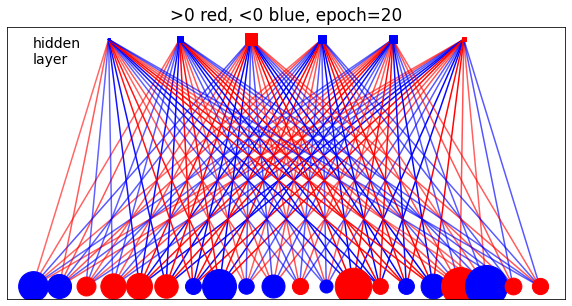

l_rate =  0.8333333333333337
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 27.64954995  28.50832446 -30.53813468  28.46146876 -28.77872209
  28.84306651]
EVALUATED ENERGIES =  [   0.         -183.74972206  -92.11663885  -89.21876525] 

PROBABILITY :  [1.57946373e-80 1.00000000e+00 1.60050709e-40 8.82525142e-42] 

CUMULATIVE PROBABILITY :  [1.57946373e-80 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 27.64954995  28.50832446 -30.53813468  28.46146876 -28.77872209
  28.84306651]
EVALUATED ENERGIES =  [-181.3077635  -177.24524708 -123.86183874 -240.15092801] 

PROBABILITY :  [2.78444315e-26 4.79082042e-28 3.13538031e-51 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [2.78444315e-26 2.83235136e-26 2.83235136e-26 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 27.64954995  28.50832446 -30.53813468  28.46146876 -28.77872209
  28.84306651]
EVALUATED ENERGIES =  [-173.40048827 -178.98551385 -356.30

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 30.3350045   31.18048699 -33.42595837  31.13382413 -31.65182126
  31.54022905]
EVALUATED ENERGIES =  [   0.         -201.4241711  -100.86033031  -97.91966057] 

PROBABILITY :  [3.33114832e-88 1.00000000e+00 2.11679533e-44 1.11831004e-45] 

CUMULATIVE PROBABILITY :  [3.33114832e-88 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 30.3350045   31.18048699 -33.42595837  31.13382413 -31.65182126
  31.54022905]
EVALUATED ENERGIES =  [-198.4896781  -194.27148675 -135.58204536 -263.00427512] 

PROBABILITY :  [9.58664209e-29 1.41165733e-30 4.58383254e-56 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [9.58664209e-29 9.72780782e-29 9.72780782e-29 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 30.3350045   31.18048699 -33.42595837  31.13382413 -31.65182126
  31.54022905]
EVALUATED ENERGIES =  [-190.00266458 -195.9301144  -390.0811593     0.        ] 

PROBA

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 33.01761146  33.8762087  -36.27489879  33.83283786 -34.46657536
  34.18856971]
EVALUATED ENERGIES =  [   0.         -218.76631424 -109.48241481 -106.48467456] 

PROBABILITY :  [9.79482990e-96 1.00000000e+00 3.45625294e-48 1.72465991e-49] 

CUMULATIVE PROBABILITY :  [9.7948299e-96 1.0000000e+00 1.0000000e+00 1.0000000e+00] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 33.01761146  33.8762087  -36.27489879  33.83283786 -34.46657536
  34.18856971]
EVALUATED ENERGIES =  [-215.39214378 -211.02202653 -147.01679146 -285.63181077] 

PROBABILITY :  [3.12824109e-31 3.95714906e-33 6.31338107e-61 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [3.12824109e-31 3.16781258e-31 3.16781258e-31 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 33.01761146  33.8762087  -36.27489879  33.83283786 -34.46657536
  34.18856971]
EVALUATED ENERGIES =  [-206.4781144  -212.52796859 -423.27064351    0.        ] 

PROBABILI

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 35.65686307  36.49307322 -39.07478266  36.47829593 -37.29217536
  36.84404068]
EVALUATED ENERGIES =  [   0.         -235.9557465  -117.93255675 -114.88342295] 

PROBABILITY :  [3.35522247e-103 1.00000000e+000 5.53579444e-052 2.62396459e-053] 

CUMULATIVE PROBABILITY :  [3.35522247e-103 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 35.65686307  36.49307322 -39.07478266  36.47829593 -37.29217536
  36.84404068]
EVALUATED ENERGIES =  [-232.14785991 -227.50354911 -158.45791404 -307.89470109] 

PROBABILITY :  [1.26930167e-33 1.22058015e-35 1.26016667e-65 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [1.26930167e-33 1.28150748e-33 1.28150748e-33 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 35.65686307  36.49307322 -39.07478266  36.47829593 -37.29217536
  36.84404068]
EVALUATED ENERGIES =  [-222.54247569 -228.86654924 -456.19992093    0.        ]

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 38.23707804  39.10342192 -41.84624873  39.04106308 -40.04968067
  39.44324078]
EVALUATED ENERGIES =  [   0.         -252.67061964 -126.27397657 -123.13169191] 

PROBABILITY :  [1.84732859e-110 1.00000000e+000 1.27830764e-055 5.52024682e-057] 

CUMULATIVE PROBABILITY :  [1.84732859e-110 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 38.23707804  39.10342192 -41.84624873  39.04106308 -40.04968067
  39.44324078]
EVALUATED ENERGIES =  [-248.6239629  -243.64165685 -169.70665795 -329.78940175] 

PROBABILITY :  [5.62727039e-36 3.85931084e-38 2.99880147e-70 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [5.62727039e-36 5.66586349e-36 5.66586349e-36 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 38.23707804  39.10342192 -41.84624873  39.04106308 -40.04968067
  39.44324078]
EVALUATED ENERGIES =  [-238.50328059 -245.05197606 -488.46026338    0.        ]

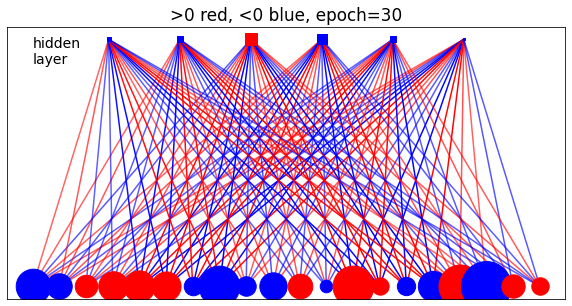

l_rate =  0.7692307692307697
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 40.79567785  41.64347764 -44.59022887  41.59366725 -42.79362447
  41.97085706]
EVALUATED ENERGIES =  [   0.         -269.41229842 -134.40606233 -131.23498649] 

PROBABILITY :  [9.90205740e-118 1.00000000e+000 2.33096978e-059 9.78038393e-061] 

CUMULATIVE PROBABILITY :  [9.9020574e-118 1.0000000e+000 1.0000000e+000 1.0000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 40.79567785  41.64347764 -44.59022887  41.59366725 -42.79362447
  41.97085706]
EVALUATED ENERGIES =  [-264.71778557 -259.61069755 -180.82472965 -351.32896086] 

PROBABILITY :  [2.42797662e-38 1.46982068e-40 8.93209315e-75 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [2.42797662e-38 2.44267482e-38 2.44267482e-38 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 40.79567785  41.64347764 -44.59022887  41.59366725 -42.79362447
  41.97085706]
EVALUATED ENERGIES =  [-254.05283243 -261.07402063 -52

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 43.2876802   44.16770547 -47.22635335  44.11935133 -45.48783469
  44.49681125]
EVALUATED ENERGIES =  [   0.         -285.67286213 -142.56863426 -139.16488666] 

PROBABILITY :  [8.58721521e-125 1.00000000e+000 7.08962883e-063 2.35719060e-064] 

CUMULATIVE PROBABILITY :  [8.58721521e-125 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 43.2876802   44.16770547 -47.22635335  44.11935133 -45.48783469
  44.49681125]
EVALUATED ENERGIES =  [-280.81166696 -275.38697471 -191.46808843 -372.59089862] 

PROBABILITY :  [1.38288522e-40 6.09357590e-43 2.18455502e-79 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [1.38288522e-40 1.38897880e-40 1.38897880e-40 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 43.2876802   44.16770547 -47.22635335  44.11935133 -45.48783469
  44.49681125]
EVALUATED ENERGIES =  [-269.63809373 -276.64766714 -551.44249364    0.        ]

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 45.77841841  46.64471618 -49.89828318  46.58569902 -48.08997641
  46.96043623]
EVALUATED ENERGIES =  [   0.         -301.73216949 -150.62974157 -147.08312544] 

PROBABILITY :  [9.10717701e-132 1.00000000e+000 2.38259021e-066 6.86710263e-068] 

CUMULATIVE PROBABILITY :  [9.10717701e-132 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 45.77841841  46.64471618 -49.89828318  46.58569902 -48.08997641
  46.96043623]
EVALUATED ENERGIES =  [-296.45238238 -290.89093916 -202.2246275  -393.51240694] 

PROBABILITY :  [7.03666577e-43 2.70434952e-45 8.40955349e-84 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [7.03666577e-43 7.06370926e-43 7.06370926e-43 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 45.77841841  46.64471618 -49.89828318  46.58569902 -48.08997641
  46.96043623]
EVALUATED ENERGIES =  [-284.80683377 -292.24305333 -582.35744009    0.        ]

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 48.21558811  49.05223415 -52.51221353  49.01698703 -50.69966132
  49.43779388]
EVALUATED ENERGIES =  [   0.         -317.78012969 -158.5031523  -154.90357873] 

PROBABILITY :  [9.76884497e-139 1.00000000e+000 6.71255141e-070 1.83490121e-071] 

CUMULATIVE PROBABILITY :  [9.76884497e-139 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 48.21558811  49.05223415 -52.51221353  49.01698703 -50.69966132
  49.43779388]
EVALUATED ENERGIES =  [-311.93720273 -306.14881644 -212.76158715 -414.12232402] 

PROBABILITY :  [4.18374966e-45 1.28144942e-47 3.54930325e-88 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [4.18374966e-45 4.19656416e-45 4.19656416e-45 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 48.21558811  49.05223415 -52.51221353  49.01698703 -50.69966132
  49.43779388]
EVALUATED ENERGIES =  [-299.74678954 -307.51375538 -612.68308962    0.        ]

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 50.61439661  51.46272148 -55.07206754  51.40843185 -53.28139167
  51.80845726]
EVALUATED ENERGIES =  [   0.         -333.39615588 -166.35379635 -162.62211673] 

PROBABILITY :  [1.61394679e-145 1.00000000e+000 2.84724614e-073 6.81988646e-075] 

CUMULATIVE PROBABILITY :  [1.61394679e-145 1.00000000e+000 1.00000000e+000 1.00000000e+000] 


----initiating backward CD: k =  100 ----
WEIGHTS[0] :  [ 50.61439661  51.46272148 -55.07206754  51.40843185 -53.28139167
  51.80845726]
EVALUATED ENERGIES =  [-327.22189573 -321.19085165 -223.0174695  -434.33901573] 

PROBABILITY :  [3.01735122e-47 7.25064602e-50 1.67578603e-92 1.00000000e+00] 

CUMULATIVE PROBABILITY :  [3.01735122e-47 3.02460186e-47 3.02460186e-47 1.00000000e+00] 


----initiating backward CD: k =  200 ----
WEIGHTS[0] :  [ 50.61439661  51.46272148 -55.07206754  51.40843185 -53.28139167
  51.80845726]
EVALUATED ENERGIES =  [-314.6014482  -322.53962485 -642.60233608    0.        ]

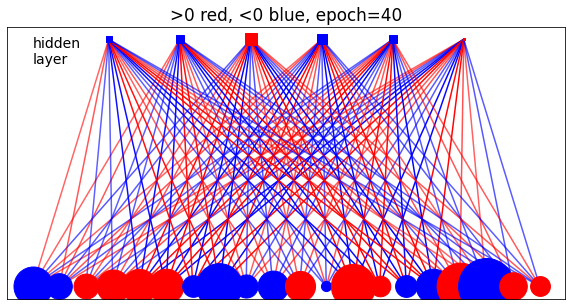

l_rate =  0.7142857142857149


In [116]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate
l_rate = 1.0

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(40): #stopped at 40, otherwise it overflowed
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf,_ = activate_back(h,v[k],w.T,a,GAP,k) 
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "vanilla" SGD
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)
            db = l_rate_m*(h_data - h_model)
            if epoch<=10 and k<=mini: #print dw etc for each epoch up until 10, just to check
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
            # basic step of vanilla gradient descent, from eq.(211)
            w = w + dw
            a = a + da
            b = b + db
            m=0
    
    # randomize the order of input data
    #np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

In [25]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)
print(dw)

w0= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.

In [109]:
#to check 
vf, cprob = activate_back(h,v[1],w.T,a,GAP,1)
print(cprob)
print(vf)

[4.24541639e-198 2.26857400e-096 1.00000000e+000 1.00000000e+000]
[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
